In [229]:
#Imports
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd
import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
#Supervised Learning Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from tabulate import tabulate

In [230]:
df_all = pd.read_csv('data/wdms/WDMAll.csv',index_col=0)
df_100 = pd.read_csv('data/wdms/WDM100.csv',index_col=0)
overall_scores= []

In [231]:
#Creating Training and Testing Datasets.
rd.seed(30)
TrainAll, TestAll = train_test_split(df_all, test_size=0.33)
Train100, Test100= train_test_split(df_100, test_size=0.33)

#Generate Labels
TrainAllLabels = (TrainAll['LABEL'] == 'Positive').astype(int)
TestAllLabels = (TestAll['LABEL'] == 'Positive').astype(int)
Train100Labels = (Train100['LABEL'] == 'Positive').astype(int)
Test100Labels = (Test100['LABEL'] == 'Positive').astype(int)

#Drop Labels from Datasets.
TrainAll = TrainAll.drop('LABEL',axis=1)
TestAll = TestAll.drop('LABEL',axis=1)
Train100 = Train100.drop('LABEL',axis=1)
Test100 = Test100.drop('LABEL',axis=1)

In [232]:
print(TrainAll.shape)
TrainAll.head()

(20, 280)


,able,accessory,accurate,add,added,additional,ago,allow,amazing,amazon,...,wife,wont,work,worth,wouldnt,write,wrong,ya,yard,year
16,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,2
22,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
print(TestAll.shape)
TestAll.head()

(10, 280)


,able,accessory,accurate,add,added,additional,ago,allow,amazing,amazon,...,wife,wont,work,worth,wouldnt,write,wrong,ya,yard,year
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [234]:
print(Train100.shape)
Train100.head()

(20, 100)


,able,add,archer,archery,arrow,bag,beginner,better,black,bought,...,ve,video,wa,wanted,way,weight,work,worth,yard,year
16,0,0,0,1,1,0,2,0,0,2,...,0,1,2,2,0,0,0,1,1,1
20,0,0,1,0,2,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,3,0,0,0,0,1,...,0,0,4,1,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [235]:
print(Test100.shape)
Test100.head()

(10, 100)


,able,add,archer,archery,arrow,bag,beginner,better,black,bought,...,ve,video,wa,wanted,way,weight,work,worth,yard,year
19,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,1,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18,1,1,0,0,2,1,0,0,0,0,...,0,0,3,0,0,0,1,1,0,0
28,1,0,0,0,4,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [236]:
TrainAllLabels

16    1
29    0
4     1
22    1
7     0
14    1
24    1
11    0
26    1
12    1
0     1
8     1
6     1
10    1
27    0
5     0
13    0
23    0
3     0
20    1
Name: LABEL, dtype: int32

In [237]:
TestAllLabels

19    0
2     1
25    0
28    1
1     0
15    0
17    0
21    0
9     0
18    1
Name: LABEL, dtype: int32

In [238]:
Train100Labels

16    1
20    1
0     1
1     0
5     0
7     0
27    0
24    1
26    1
4     1
25    0
2     1
10    1
11    0
17    0
3     0
21    0
14    1
6     1
9     0
Name: LABEL, dtype: int32

In [239]:
Test100Labels

19    0
13    0
22    1
18    1
28    1
29    0
23    0
8     1
15    0
12    1
Name: LABEL, dtype: int32

Preds:  [[0.98 0.02]
 [0.   1.  ]
 [0.62 0.38]
 [0.13 0.87]
 [0.98 0.02]
 [0.99 0.01]
 [0.1  0.9 ]
 [0.99 0.01]
 [0.06 0.94]
 [0.   1.  ]]
Actual:  19    0
2     1
25    0
28    1
1     0
15    0
17    0
21    0
9     0
18    1
Name: LABEL, dtype: int32
Preds:  [[0.98 0.02]
 [0.23 0.77]
 [0.86 0.14]
 [0.   1.  ]
 [0.69 0.31]
 [0.97 0.03]
 [0.98 0.02]
 [0.34 0.66]
 [0.99 0.01]
 [1.   0.  ]]
Actual:  19    0
13    0
22    1
18    1
28    1
29    0
23    0
8     1
15    0
12    1
Name: LABEL, dtype: int32

The confusion matrix is:
[[5 2]
 [0 3]]

The confusion matrix is:
[[4 1]
 [3 2]]


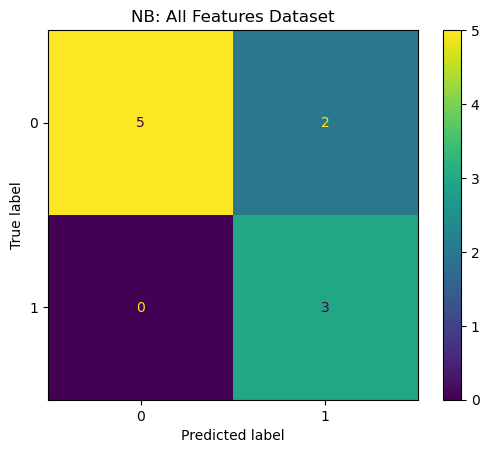

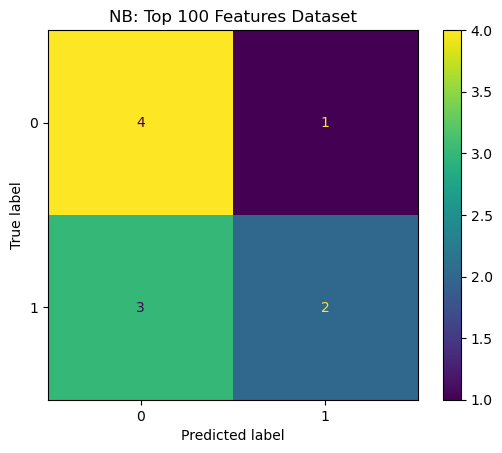

In [240]:
#Naive-Bayes
#Create the modeler
preds=[]

NB1=MultinomialNB().fit(TrainAll, TrainAllLabels)
preds += [NB1.predict(TestAll)]
NB2=MultinomialNB().fit(Train100, Train100Labels)
preds += [NB2.predict(Test100)]

print('Preds: ',np.round(NB1.predict_proba(TestAll),2))
print('Actual: ',TestAllLabels)
print('Preds: ',np.round(NB2.predict_proba(Test100),2))
print('Actual: ',Test100Labels)

## confusion matrix
#from sklearn.metrics import confusion_matrix

## The confusion matrix is square and is labels X labels
## We ahve two labels, so ours will be 2X2
#The matrix shows
## rows are the true labels
## columns are predicted
## it is allhabetical
## The numbers are how many
matrices=[]
print("\nThe confusion matrix is:")
c_m = confusion_matrix(TestAllLabels, preds[0])
print(c_m)
matrices+=[c_m]
print("\nThe confusion matrix is:")
c_m = confusion_matrix(Test100Labels, preds[1])
matrices+=[c_m]
print(c_m)
titles=['NB: All Features Dataset','NB: Top 100 Features Dataset']
for i in range(2):
    ConfusionMatrixDisplay(confusion_matrix=matrices[i]).plot()
    plt.title(titles[i])

overall_scores+=[['Multinomial Naive-Bayes',f1_score(TestAllLabels, preds[0]),f1_score(Test100Labels, preds[1])]]

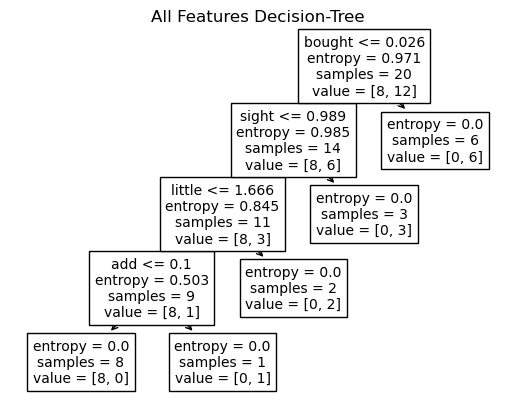

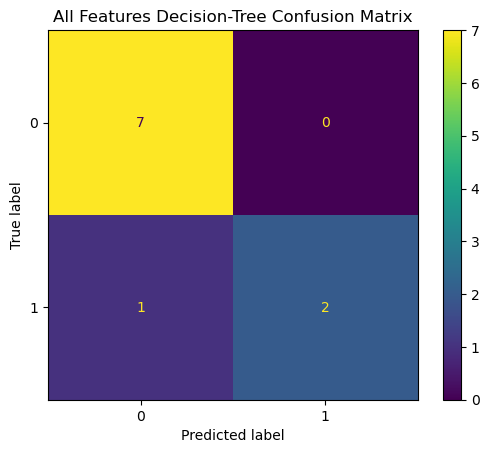

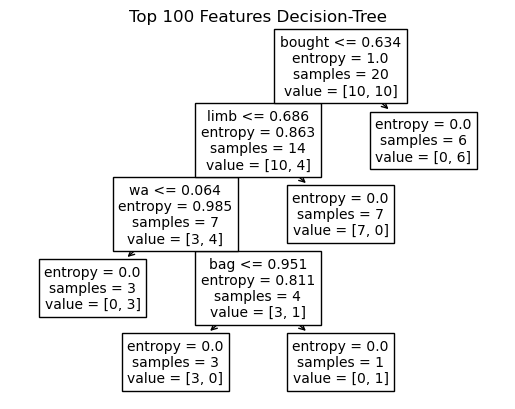

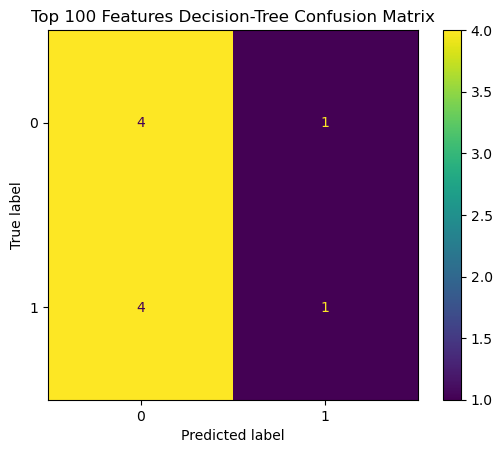

In [241]:
#Decision Trees
MyDT_All = DecisionTreeClassifier(
    criterion='entropy',
    splitter='random',
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0,
    random_state=1234).fit(TrainAll,TrainAllLabels)
plot_tree(MyDT_All,feature_names=list(TrainAll.columns))
plt.title('All Features Decision-Tree')
plt.show()
pred_all=MyDT_All.predict(TestAll)
c_m = confusion_matrix(TestAllLabels,pred_all)
ConfusionMatrixDisplay(confusion_matrix=c_m).plot()
plt.title('All Features Decision-Tree Confusion Matrix')
plt.show()

MyDT_100 = DecisionTreeClassifier(
    criterion='entropy',
    splitter='random',
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0,
    random_state=12).fit(Train100,Train100Labels)
plot_tree(MyDT_100,feature_names=list(Train100.columns))
plt.title('Top 100 Features Decision-Tree')
plt.show()

pred_100=MyDT_100.predict(Test100)
c_m = confusion_matrix(Test100Labels,pred_100)
ConfusionMatrixDisplay(confusion_matrix=c_m).plot()
plt.title('Top 100 Features Decision-Tree Confusion Matrix')
plt.show()

overall_scores+=[['Decison-Tree',f1_score(TestAllLabels, pred_all),f1_score(Test100Labels, pred_100)]]

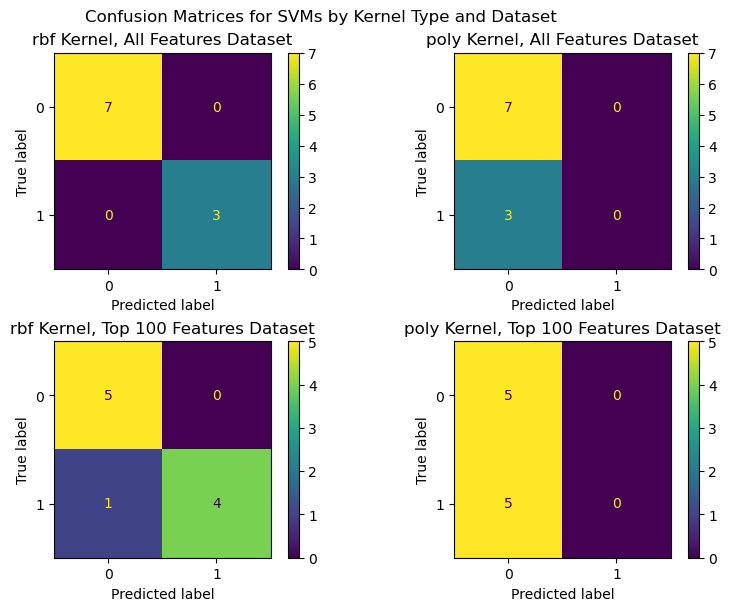

In [242]:
#SVM

fig, ax = plt.subplots(2,2,constrained_layout=True, figsize=(8,6))
kernels=['rbf','poly']
TrainData=[TrainAll,Train100]
TrainLabels=[TrainAllLabels,Train100Labels]
TestData=[TestAll,Test100]
TestLabels=[TestAllLabels,Test100Labels]
data_title=['All Features', 'Top 100 Features']
for j in range(2):
    overall=[f'{kernels[j]}'+' Kernel SVM']
    for i in range(2):
        SVM = SVC(kernel=kernels[j])
        SVM.fit(TrainData[i],TrainLabels[i])
        c_m = confusion_matrix(TestLabels[i],SVM.predict(TestData[i]))
        ConfusionMatrixDisplay(c_m).plot(ax=ax[i,j])
        ax[i,j].set_title(kernels[j]+' Kernel, '+data_title[i]+' Dataset')
        overall+=[f1_score(TestLabels[i],SVM.predict(TestData[i]))]
    overall_scores+=[overall]
fig.suptitle('Confusion Matrices for SVMs by Kernel Type and Dataset')
plt.show()

In [243]:
header=['Classification Method','F1 All-Features','F1 Top 100']
data=overall_scores
print(tabulate(data,headers=header))

Classification Method      F1 All-Features    F1 Top 100
-----------------------  -----------------  ------------
Multinomial Naive-Bayes               0.75      0.5
Decison-Tree                          0.8       0.285714
rbf Kernel SVM                        1         0.888889
poly Kernel SVM                       0         0


In [255]:
avg_data= [['Multinomial Naive-Bayes',0.78,0.345],
       ['Decision-Tree',0.578,0.36],
       ['rbf Kernel SVM',0.8,0.843],
       ['poly Kernel SVM',0,0.355]
]
print(tabulate(avg_data,headers=header))

Classification Method      F1 All-Features    F1 Top 100
-----------------------  -----------------  ------------
Multinomial Naive-Bayes              0.78          0.345
Decision-Tree                        0.578         0.36
rbf Kernel SVM                       0.8           0.843
poly Kernel SVM                      0             0.355
